The code below trains a kmeans algorithm to cluster banks based on balance sheet data in Q4 2019. Clustering banks can uncover important heterogeneity that affects the response of bank balance sheet variables to economic shocks. After clustering banks, I show that there is substantial heterogentiy in balance sheet growth across bank clusters during the onset of the COVID 19 pandemic. This suggests that my clusters uncover some of the factors that drive bank exposure to the financial distress that accompanied this time period. 

The table below shows the features used. Most names are self explanatory. "a4s_ratio" is the ratio of available for sale assets to total assets. "int_balances_size" is the ratio of interest bearing assets (these are highly liquid assets like deposits at other banks) to total assets. "currency_size" is the ratio of currency on hand to total assets, which is also a measure of liquidity. "re_owned_size" is the ratio of real estate owned to total assets. 

In [52]:
import os
os.getcwd()
os.chdir('C:\\Users\dzink\Documents\callreports_19902010')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df=pd.read_pickle("./bank_data.pkl")
df=df[df['year']==2019]

X=df[['year', 'IDRSSD', 'equity_ratio', 'log_size', 'deposit_ratio', 'a4s_ratio', 
       'int_balances_size', 'currency_size', 'forsale_loans_size', 'investment_loans_size', 
        're_owned_size', 'trading_assets_size', 'losses_allowance_size', 'investment_loans', 'Financial Institution Name']]

features=['equity_ratio', 'log_size', 'deposit_ratio', 'a4s_ratio', 
          'int_balances_size', 'currency_size', 'forsale_loans_size', 'investment_loans_size', 
        're_owned_size', 'trading_assets_size', 'losses_allowance_size']

X.describe()

,year,IDRSSD,equity_ratio,log_size,deposit_ratio,a4s_ratio,int_balances_size,currency_size,forsale_loans_size,investment_loans_size,re_owned_size,trading_assets_size,losses_allowance_size,investment_loans
count,5227.0,5.227000e+03,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5227.000000,5.227000e+03
mean,2019.0,9.689344e+05,0.135129,12.535759,0.937132,0.163886,0.080362,0.022327,0.004817,0.645539,0.001566,0.000572,0.008186,1.986045e+06
std,0.0,1.036738e+06,0.102484,1.497278,0.123198,0.144429,0.103454,0.040786,0.031113,0.179266,0.005388,0.013643,0.005376,2.632315e+07
min,2019.0,3.700000e+01,0.014298,8.018296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2019.0,3.241910e+05,0.100493,11.579855,0.925283,0.057082,0.018194,0.009904,0.000000,0.562477,0.000000,0.000000,0.005689,6.365450e+04
50%,2019.0,6.404420e+05,0.114608,12.357385,0.971189,0.132623,0.050781,0.016333,0.000000,0.688794,0.000037,0.000000,0.007725,1.529390e+05
75%,2019.0,9.417285e+05,0.135460,13.248305,0.993081,0.234683,0.105402,0.025054,0.000692,0.770588,0.001222,0.000000,0.009868,3.905670e+05
max,2019.0,5.448915e+06,0.999671,21.572410,1.000000,0.969749,0.997912,0.979467,0.899157,0.996236,0.142894,0.661433,0.160368,9.698290e+08


Below I standardize the data and then train the kmeans algorithm for values of k ranging from 5 to 50. It is crucial to standardize features when using kmeans. Otherwise features with higher variance will get larger weight during training. I overcome this by standardizing all features to have unit variance and mean 0. I plot the sum of squared errors (sse) against k to select the optimal k. The reduction in SSE begins to slow after k=12, and so I choose k=12 as and re-estimate the model with this value. This method of choosing k is known as the "elbow method". 

C:\Users\dzink\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


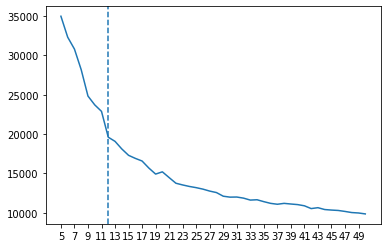

In [53]:

X.loc[:,features]=X.loc[:,features].apply(lambda x: x.fillna(x.mean()), axis=0)

X_transformed=pd.DataFrame(preprocessing.StandardScaler().fit_transform(X[features]), columns=features)


kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 22,
    }
sse=[]
for i in range(5, 51):
    kmeans=KMeans(n_clusters=i, **kmeans_kwargs).fit(X_transformed)
    sse.append(kmeans.inertia_)
    
x_ticks=plt.xticks(np.arange(5, 51, 2)) 
plt.plot(range(5, 51), sse)
plt.axvline(x=12, linestyle='--')

In [54]:
kmeans_final=KMeans(n_clusters=12, **kmeans_kwargs).fit(X_transformed)

P=kmeans_final.predict(X_transformed)
X['cluster']=P

C:\Users\dzink\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The table below summarizes the percentage of the variance for the features in my dataframe that can be explained by cluster membership. This is given by the R2 column. Cluster membership can explain over 40% of the variance in each feature. 

In [55]:

group_means=X.groupby('cluster').aggregate({'mean'})[features]
group_means.columns=group_means[features].columns.get_level_values(0) +'_mean'
group_means.reset_index(level=0, inplace=True)
X=X.merge(group_means, how='inner', on='cluster')

summary_stats=pd.DataFrame(np.power(np.array(X[[f + '_mean' for f in features]])-np.array(X[features]), 2).sum(axis=0)/X.shape[0], 
                           index=features, columns=['Within'])

summary_stats=X.aggregate({'var'})[features].T.join(summary_stats, how='inner')
summary_stats.rename(columns={'var':'Total'}, inplace=True)
summary_stats['R2']=(summary_stats['Total']-summary_stats['Within'])/summary_stats['Total']
summary_stats

,Total,Within,R2
equity_ratio,0.010503,0.002471,0.764761
log_size,2.241841,1.082655,0.517069
deposit_ratio,0.015178,0.004957,0.673376
a4s_ratio,0.020860,0.006276,0.699125
int_balances_size,0.010703,0.004011,0.625269
currency_size,0.001663,0.000442,0.734191
forsale_loans_size,0.000968,0.000314,0.675277
investment_loans_size,0.032136,0.008379,0.739252
re_owned_size,0.000029,0.000014,0.520606
trading_assets_size,0.000186,0.000027,0.852873


Below I present summary statistics for each feature grouped by cluster. I also report the average distance to center for each cluster and the number of observations within each cluster.

In [56]:
X['distance_to_center']=kmeans_final.transform(X_transformed).min(axis=1)

features.append('distance_to_center')

cluster_summary=X.groupby('cluster').aggregate({'mean', 'std'})[features]
cluster_summary['N']=np.unique(P, return_counts=True)[1]
cluster_summary=cluster_summary.T
cluster_summary

cluster                            0          1            2           3   \
equity_ratio          mean   0.856630   0.192005     0.118975    0.141102   
                      std    0.277553   0.077315     0.039117    0.072373   
log_size              mean  10.853167  13.629431    12.226577   11.384615   
                      std    2.148935   2.448318     0.869853    1.052715   
deposit_ratio         mean   0.276904   0.905323     0.950782    0.977085   
                      std    0.406731   0.140360     0.052359    0.049822   
a4s_ratio             mean   0.002056   0.060854     0.069105    0.100975   
                      std    0.005728   0.057313     0.051729    0.099539   
int_balances_size     mean   0.015667   0.097582     0.063851    0.268270   
                      std    0.047000   0.078293     0.050991    0.128298   
currency_size         mean   0.847300   0.013607     0.019603    0.028926   
                      std    0.137543   0.013591     0.015482    0.030211   
forsale_loans_size    mean   0.000000   0.006821     0.002597    0.000962   
                      std    0.000000   0.026218     0.010752    0.007496   
investment_loans_size mean   0.003118   0.776283     0.774816    0.480776   
                      std    0.009354   0.102384     0.065000    0.152502   
re_owned_size         mean   0.000007   0.001211     0.001728    0.001373   
                      std    0.000021   0.002442     0.003663    0.003787   
trading_assets_size   mean   0.000000   0.000014     0.000021    0.000027   
                      std    0.000000   0.000068     0.000497    0.000538   
losses_allowance_size mean   0.000038   0.053274     0.009731    0.006606   
                      std    0.000114   0.030049     0.003714    0.003838   
distance_to_center    mean   3.464074   1.419788     1.518978    1.822024   
                      std    1.649103   0.803291     0.925484    1.686698   
N                            9.000000  25.000000  1923.000000  503.000000   

cluster                              4          5          6          7   \
equity_ratio          mean     0.121442   0.117497   0.130057   0.835476   
                      std      0.030415   0.095557   0.053446   0.259965   
log_size              mean    12.236748  11.564368  13.008470  11.278358   
                      std      0.847829   0.912930   1.809477   2.020377   
deposit_ratio         mean     0.960135   0.952435   0.834019   0.283804   
                      std      0.048002   0.053934   0.182470   0.381230   
a4s_ratio             mean     0.237614   0.071201   0.066063   0.023244   
                      std      0.068602   0.067583   0.102155   0.053050   
int_balances_size     mean     0.049703   0.103110   0.074899   0.827261   
                      std      0.041729   0.070743   0.111694   0.177291   
currency_size         mean     0.022209   0.027888   0.023292   0.017184   
                      std      0.016932   0.034945   0.045897   0.039084   
forsale_loans_size    mean     0.001260   0.002327   0.314784   0.000031   
                      std      0.006379   0.005473   0.165434   0.000153   
investment_loans_size mean     0.611244   0.650055   0.427819   0.015106   
                      std      0.077230   0.088012   0.182733   0.065937   
re_owned_size         mean     0.001448   0.067281   0.001751   0.000000   
                      std      0.003010   0.037169   0.004000   0.000000   
trading_assets_size   mean     0.000047   0.000000   0.001339   0.000000   
                      std      0.000598   0.000000   0.007391   0.000000   
losses_allowance_size mean     0.007903   0.012168   0.005662   0.000029   
                      std      0.002966   0.011359   0.006924   0.000114   
distance_to_center    mean     1.476192   1.439753   2.577830   1.431004   
                      std      0.808972   0.778388   2.108958   0.568734   
N                           1349.000000  18.000000  35.000000  25.000000   

cluster             

The table below lists the largest banks within each cluster. This gives me an idea of which kind of banks are in each cluster. Some of the groupings are intuitive. For example the largest lenders in cluster 0 are all trust companies. These companies don't raise deposits and hence members of this group have an average equity ratio of 0.85, which is very high. The largest lenders in cluster 8 are investment banks. Not surprisingly, these lenders hold a lot of available for sale assets (which consist of financial assets). 

In [57]:

#5 largest banks in each cluster
X['cluster_rank']=X.groupby('cluster')['log_size'].rank('dense', ascending=False)

biglenders=X.loc[X['cluster_rank']<=5, ['cluster', 'cluster_rank', 'Financial Institution Name']]
biglenders.sort_values(by=['cluster', 'cluster_rank'])

,cluster,cluster_rank,Financial Institution Name
5216,0,1.0,"WILMINGTON TRUST, NATIONAL ASSOCIATION"
5221,0,2.0,"RECONTRUST COMPANY, NATIONAL ASSOCIATION"
5219,0,3.0,"CHICAGO TRUST COMPANY, N. A., THE"
5215,0,4.0,"COMERICA BANK & TRUST, NATIONAL ASSOCIATION"
5218,0,5.0,"COMPUTERSHARE TRUST COMPANY, NATIONAL ASSOCIATION"
5097,1,1.0,"CAPITAL ONE BANK (USA), NATIONAL ASSOCIATION"
5092,1,2.0,SYNCHRONY BANK
5099,1,3.0,BARCLAYS BANK DELAWARE
5096,1,4.0,"TD BANK USA, NATIONAL ASSOCIATION"
5093,1,5.0,COMENITY BANK


In the code below I import balance sheet data for Q1 2020 and merge with the existing data. Bank balance sheets grew dramatically during Q1 2020 as cash strapped firms drew down credit lines as a result of the Covid-19 pandemic. The regressions below demonstrate how asset growth during this time period varied between banks in different clusters. 

In [58]:
dummies=pd.get_dummies(X['cluster'], drop_first=True).rename(columns=lambda x: 'Category_' + str(x))
X=pd.concat([dummies, X], axis=1)
df_2020=pd.read_pickle(path='./bank_data20200331.pkl')
X=X.merge(pd.read_pickle(path='./bank_data20200331.pkl'), how='inner', on='IDRSSD')
X['equity_ratio_2020']=X['equity_2020']/X['size_2020']
X['equity_growth']=X['equity_ratio_2020']-X['equity_ratio']
X['asset_growth']=np.log(X['size_2020'])-X['log_size']

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model0 = smf.ols('asset_growth~Category_1 + Category_2 + Category_3 + Category_4 + Category_5 + Category_6 +\
                 Category_7 + Category_8 + Category_9 + Category_10 + Category_11', data=X).fit()
model0.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           asset_growth   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     17.92
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.59e-35
Time:                        10:01:53   Log-Likelihood:                 7127.4
No. Observations:                5163   AIC:                        -1.423e+04
Df Residuals:                    5151   BIC:                        -1.415e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0421      0.022      1.954      0.051      -0.000       0.084
Category_1     -0.0225      0.025     -0.908      0.364      -0.071       0.026
Category_2     -0.0192      0.022     -0.889      0.374      -0.062       0.023
Category_3     -0.0343      0.022     -1.578      0.115      -0.077       0.008
Category_4     -0.0244      0.022     -1.127      0.260      -0.067       0.018
Category_5     -0.0307      0.026     -1.176      0.240      -0.082       0.020
Category_6      0.0752      0.024      3.151      0.002       0.028       0.122
Category_7      0.0438      0.025      1.770      0.077      -0.005       0.092
Category_8     -0.0424      0.023     -1.832      0.067      -0.088       0.003
Category_9     -0.0231      0.022     -1.065      0.287      -0.066       0.019
Category_10    -0.0081      0.022     -0.373      0.709      -0.050       0.034
Category_11    -0.1254      0.041     -3.040      0.002      -0.206      -0.045
==============================================================================
Omnibus:                     4380.385   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           310721.997
Skew:                           3.640   Prob(JB):                         0.00
Kurtosis:                      40.301   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The point estimates on each category paremeter in the table above are all relative to cluster 0. There is evidence of heterogeneity in asset growth between banks in different clusters. 